In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
matches=pd.read_csv(r'C:\Users\DeLL\Downloads\matches.csv')
deliveries=pd.read_csv(r'C:\Users\DeLL\Desktop\deliveries1.csv')

In [3]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
id                 636 non-null int64
season             636 non-null int64
city               629 non-null object
date               636 non-null object
team1              636 non-null object
team2              636 non-null object
toss_winner        636 non-null object
toss_decision      636 non-null object
result             636 non-null object
dl_applied         636 non-null int64
winner             633 non-null object
win_by_runs        636 non-null int64
win_by_wickets     636 non-null int64
player_of_match    633 non-null object
venue              636 non-null object
umpire1            635 non-null object
umpire2            635 non-null object
umpire3            0 non-null float64
dtypes: float64(1), int64(5), object(12)
memory usage: 89.5+ KB


In [4]:
matches[pd.isnull(matches['winner'])]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker,NaN
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak,NaN
570,571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan,NaN


In [5]:
matches['winner'].fillna('Draw', inplace=True)

In [6]:
matches.replace(['Mumbai Indians', 'Kolkata Knight Riders', 'Royal Challengers Bangalore', 'Deccan Chargers', 
                 'Chennai Super Kings', 'Rajasthan Royals', 'Delhi Daredevils', 'Gujarat Lions', 'Kings XI Punjab', 'Sunrisers Hyderabad', 'Rising Pune Supergiants', 'Rising Pune Supergiant', 'Kochi Tuskers Kerala', 'Pune Warriors']
                ,['MI', 'KKR', 'RCB', 'DC', 'CSK', 'RR', 'DD', 'GL', 'KXIP',
                 'SRH', 'RPS', 'RPS',  'KTK', 'PW'],inplace=True)
encode={'team1': {'MI':1, 'KKR':2, 'RCB':3,'DC':4, 'CSK':5, 'RR':6, 'DD':7, 'GL':8, 'KXIP':9, 'SRH':10, 'RPS':11,'KTK':12, 'PW':13}
        , 'team2': {'MI':1, 'KKR':2, 'RCB':3,'DC':4, 'CSK':5, 'RR':6, 'DD':7, 'GL':8, 'KXIP':9, 'SRH':10, 'RPS':11,'KTK':12, 'PW':13
                   },  'toss_winner': {'MI':1, 'KKR':2, 'RCB':3,'DC':4, 'CSK':5, 'RR':6, 'DD':7, 'GL':8, 'KXIP':9, 'SRH':10, 'RPS':11,'KTK':12,
                                      'PW':13}, 'winner': {'MI':1, 'KKR':2, 'RCB':3,'DC':4, 'CSK':5, 'RR':6, 'DD':7, 'GL':8, 'KXIP':9, 'SRH':10, 'RPS':11,'KTK':12,
                                                          'PW':13, 'Draw':14}}
matches.replace(encode, inplace=True)
matches.head()
        

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,10,3,3,field,normal,0,10,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,1,11,11,field,normal,0,11,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,8,2,2,field,normal,0,2,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,11,9,9,field,normal,0,9,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,3,7,3,bat,normal,0,3,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [7]:
#find cities which are null
matches[pd.isnull(matches['city'])]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
461,462,2014,NaN,2014-04-19,1,3,3,field,normal,0,3,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary,NaN
462,463,2014,NaN,2014-04-19,2,7,2,bat,normal,0,7,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni,NaN
466,467,2014,NaN,2014-04-23,5,6,6,field,normal,0,5,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth,NaN
468,469,2014,NaN,2014-04-25,10,7,10,bat,normal,0,10,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi,NaN
469,470,2014,NaN,2014-04-25,1,5,1,bat,normal,0,5,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus,NaN
474,475,2014,NaN,2014-04-28,3,9,9,field,normal,0,9,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi,NaN
476,477,2014,NaN,2014-04-30,10,1,1,field,normal,0,10,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus,NaN


In [8]:
matches['city'].fillna('Dubai',inplace=True)
matches.describe()

,id,season,team1,team2,toss_winner,dl_applied,winner,win_by_runs,win_by_wickets,umpire3
count,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,0.0
mean,318.500000,2012.490566,5.540881,5.511006,5.371069,0.025157,5.309748,13.682390,3.372642,NaN
std,183.741666,2.773026,3.329169,3.341677,3.293140,0.156726,3.288726,23.908877,3.420338,NaN
min,1.000000,2008.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,NaN
25%,159.750000,2010.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,0.000000,NaN
50%,318.500000,2012.000000,5.000000,5.000000,5.000000,0.000000,5.000000,0.000000,4.000000,NaN
75%,477.250000,2015.000000,9.000000,8.000000,7.250000,0.000000,8.000000,20.000000,7.000000,NaN
max,636.000000,2017.000000,13.000000,13.000000,13.000000,1.000000,14.000000,146.000000,10.000000,NaN


In [9]:
dicVal=encode['winner']
print(dicVal['MI'])
print(list(dicVal.keys())[list(dicVal.values()).index(1)])

1
MI


In [10]:
matches=matches[['team1', 'team2', 'city', 'toss_decision', 'toss_winner', 'venue', 'winner']]
matches.head(2)

,team1,team2,city,toss_decision,toss_winner,venue,winner
0,10,3,Hyderabad,field,3,"Rajiv Gandhi International Stadium, Uppal",10
1,1,11,Pune,field,11,Maharashtra Cricket Association Stadium,11


In [11]:
df=pd.DataFrame(matches)
df.describe()

,team1,team2,toss_winner,winner
count,636.000000,636.000000,636.000000,636.000000
mean,5.540881,5.511006,5.371069,5.309748
std,3.329169,3.341677,3.293140,3.288726
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,2.000000,2.000000
50%,5.000000,5.000000,5.000000,5.000000
75%,9.000000,8.000000,7.250000,8.000000
max,13.000000,13.000000,13.000000,14.000000


In [12]:
temp1=df['toss_winner'].value_counts(sort=True)
temp2=df['winner'].value_counts(sort=True)

print('No of toss winners by each team')
for idx, val in temp1.iteritems():
    print('{} -> {}'.format(list(dicVal.keys())[list(dicVal.values()).index(idx)],val))
print('No of match winners by each team')
for idx, val in temp2.iteritems():
     print('{} -> {}'.format(list(dicVal.keys())[list(dicVal.values()).index(idx)],val))
    

No of toss winners by each team
MI -> 85
KKR -> 78
DD -> 72
RCB -> 70
KXIP -> 68
CSK -> 66
RR -> 63
DC -> 43
SRH -> 35
PW -> 20
GL -> 15
RPS -> 13
KTK -> 8
No of match winners by each team
MI -> 92
CSK -> 79
KKR -> 77
RCB -> 73
KXIP -> 70
RR -> 63
DD -> 62
SRH -> 42
DC -> 29
RPS -> 15
GL -> 13
PW -> 12
KTK -> 6
Draw -> 3


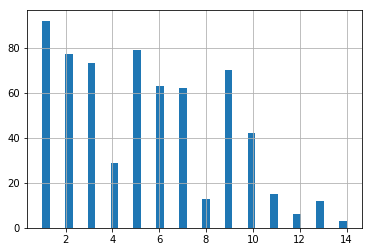

In [13]:
df['winner'].hist(bins=40) #shows MI won most matches followed by CSK 

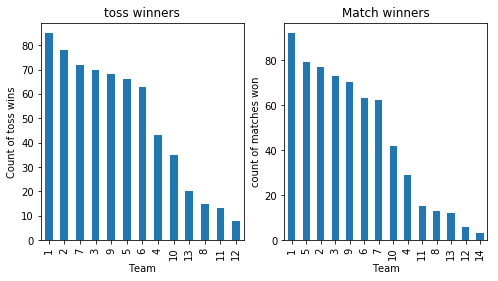

In [14]:
import matplotlib.pyplot as plt
fig= plt.figure(figsize=(8,4))
ax1= fig.add_subplot(121)
ax1.set_xlabel('Team')
ax1.set_ylabel('Count of toss wins')
ax1.set_title("toss winners")
temp1.plot(kind='bar')

ax2=fig.add_subplot(122)
temp2.plot(kind ='bar')
ax2.set_xlabel('Team')
ax2.set_ylabel('count of matches won')
ax2.set_title("Match winners")


In [15]:
df.apply(lambda x: sum(x.isnull()), axis=0 )

team1            0
team2            0
city             0
toss_decision    0
toss_winner      0
venue            0
winner           0
dtype: int64

In [16]:
#find cities which are null
df[pd.isnull(df['city'])]

,team1,team2,city,toss_decision,toss_winner,venue,winner


In [17]:
#building the model
from sklearn.preprocessing import LabelEncoder
var_mod= ['city', 'toss_decision', 'venue']
le=LabelEncoder()
for i in var_mod:
    df[i]=le.fit_transform(df[i])
df.dtypes

team1            int64
team2            int64
city             int64
toss_decision    int64
toss_winner      int64
venue            int64
winner           int64
dtype: object

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

def classification_model(model,data,predictors,outcome):
    model.fit(data[predictors],data[outcome])
    predictions=model.predict(data[predictors])
    accuracy=metrics.accuracy_score(predictions,data[outcome])
    print('Accuracy : %s' % '{0:.3%}'.format(accuracy))
    kf=KFold(data.shape[0], n_folds=7)
    for train, test in kf:
        train_predictors=(data[predictors].iloc[train,:])
        train_target=data[outcome].iloc[train]
        model.fit(train_predictors, train_target)
        
    model.fit(data[predictors], data[outcome])

C:\Users\DeLL\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [19]:
from sklearn.ensemble import RandomForestRegressor
outcome_var=['winner']
predictor_var=['team1', 'team2', 'toss_winner']
model=LogisticRegression()
classification_model(model,df,predictor_var,outcome_var)

Accuracy : 23.270%


C:\Users\DeLL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [20]:
df.head(7)

,team1,team2,city,toss_decision,toss_winner,venue,winner
0,10,3,14,1,3,23,10
1,1,11,25,1,11,16,11
2,8,2,27,1,2,25,2
3,11,9,15,1,9,11,9
4,3,7,2,0,3,14,3
5,8,10,14,1,10,23,10
6,2,1,22,1,1,34,1


In [21]:
model=RandomForestClassifier(n_estimators=100)
outcome_var=['winner']
predictor_var=['team1', 'team2', 'venue', 'toss_winner', 'city', 'toss_decision']
classification_model(model,df,predictor_var,outcome_var)

C:\Users\DeLL\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Accuracy : 89.151%


C:\Users\DeLL\Anaconda3\lib\site-packages\ipykernel\__main__.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\DeLL\Anaconda3\lib\site-packages\ipykernel\__main__.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\DeLL\Anaconda3\lib\site-packages\ipykernel\__main__.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\DeLL\Anaconda3\lib\site-packages\ipykernel\__main__.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\DeLL\Anaconda3\lib\site-packages\ipykernel\__main__.py:16: DataConversionWarning: A column-vector y

In [22]:
df.head(3)

,team1,team2,city,toss_decision,toss_winner,venue,winner
0,10,3,14,1,3,23,10
1,1,11,25,1,11,16,11
2,8,2,27,1,2,25,2


In [23]:
le.classes_[1]

'Brabourne Stadium'

In [24]:
le.classes_[2]

'Buffalo Park'

In [25]:
le.classes_[3]

'De Beers Diamond Oval'

In [26]:
le.classes_[4]

'Dr DY Patil Sports Academy'

In [27]:
le.classes_[5]

'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium'

In [28]:
le.classes_[6]

'Dubai International Cricket Stadium'

In [29]:
le.classes_[7]

'Eden Gardens'

In [30]:
le.classes_[8]


'Feroz Shah Kotla'

In [31]:
le.classes_[9]

'Green Park'

In [32]:
le.classes_[10]

'Himachal Pradesh Cricket Association Stadium'

In [33]:
le.classes_[11]

'Holkar Cricket Stadium'

In [34]:
le.classes_[12]

'JSCA International Stadium Complex'

In [35]:
le.classes_[13]

'Kingsmead'

In [36]:
le.classes_[14]

'M Chinnaswamy Stadium'

In [37]:
le.classes_[15]

'MA Chidambaram Stadium, Chepauk'

In [38]:
le.classes_[16]

'Maharashtra Cricket Association Stadium'

In [39]:
le.classes_[17]

'Nehru Stadium'

In [40]:
le.classes_[18]

'New Wanderers Stadium'

In [41]:
le.classes_[19]

'Newlands'

In [42]:
le.classes_[20]

'OUTsurance Oval'

In [43]:
le.classes_[21]

'Punjab Cricket Association IS Bindra Stadium, Mohali'

In [44]:
le.classes_[22]

'Punjab Cricket Association Stadium, Mohali'

In [45]:
le.classes_[23]

'Rajiv Gandhi International Stadium, Uppal'

In [46]:
le.classes_[24]

'Sardar Patel Stadium, Motera'

In [47]:
le.classes_[25]

'Saurashtra Cricket Association Stadium'

In [48]:
le.classes_[26]

'Sawai Mansingh Stadium'

In [49]:
le.classes_[27]

'Shaheed Veer Narayan Singh International Stadium'

In [50]:
le.classes_[28]

'Sharjah Cricket Stadium'

In [51]:
le.classes_[29]

'Sheikh Zayed Stadium'

In [52]:
le.classes_[30]

"St George's Park"

In [53]:
le.classes_[31]

'Subrata Roy Sahara Stadium'

In [54]:
le.classes_[32]

'SuperSport Park'

In [55]:
le.classes_[33]

'Vidarbha Cricket Association Stadium, Jamtha'

In [56]:
le.classes_[34]

'Wankhede Stadium'

In [57]:
#'team1', 'team2', 'venue', 'toss_winner', 'city', 'toss_decision'
#'34'-Wankhede stadium

team1='CSK'
team2='MI'
toss_winner='CSK'
input=[dicVal[team1],dicVal[team2],'34',dicVal[toss_winner],'14','1']
input=np.array(input).reshape((1, -1))
output=model.predict(input)
print(list(dicVal.keys())[list(dicVal.values()).index(output)])


MI


In [58]:
#'team1', 'team2', 'venue', 'toss_winner', 'city', 'toss_decision'
#'15'-Chidambaram stadium

team1='CSK'
team2='MI'
toss_winner='CSK'
input=[dicVal[team1],dicVal[team2],'15',dicVal[toss_winner],'14','1']
input=np.array(input).reshape((1, -1))
output=model.predict(input)
print(list(dicVal.keys())[list(dicVal.values()).index(output)])


CSK


In [59]:
#'team1', 'team2', 'venue', 'toss_winner', 'city', 'toss_decision'
#'14'-Chinaswamy stadium
team1='RCB'
team2='KXIP'
toss_winner='KXIP'
input=[dicVal[team1],dicVal[team2],'14',dicVal[toss_winner],'2','0']
input=np.array(input).reshape((1, -1))
output=model.predict(input)
print(list(dicVal.keys())[list(dicVal.values()).index(output)])


KXIP


In [60]:
#'team1', 'team2', 'venue', 'toss_winner', 'city', 'toss_decision'

#'14'-Chinaswamy stadium
team1='RCB'
team2='KKR'
toss_winner='RCB'
input=[dicVal[team1],dicVal[team2],'14',dicVal[toss_winner],'2','1']
input=np.array(input).reshape((1, -1))
output=model.predict(input)
print(list(dicVal.keys())[list(dicVal.values()).index(output)])


KKR


In [61]:
#'team1', 'team2', 'venue', 'toss_winner', 'city', 'toss_decision'
#'8'-Feroze Shah Kotla

team1='DC'
team2='DD'
toss_winner='DC'
input=[dicVal[team1],dicVal[team2],'8',dicVal[toss_winner],'14','0']
input=np.array(input).reshape((1, -1))
output=model.predict(input)
print(list(dicVal.keys())[list(dicVal.values()).index(output)])


DC


In [62]:
#feature importance
#if we ignore teams,Venue seems to be one of the most important factors in determining winners
#followed by toss winning,city
#we notice that team1 and team2 account for highest value of reason that it is either if these values
#with toss winner going to be winner
#so we ignore team1 and team2
imp_input=pd.Series(model.feature_importances_, index=predictor_var).sort_values(ascending=False)
print(imp_input)

team2            0.257677
team1            0.221508
toss_winner      0.168723
venue            0.167352
city             0.150068
toss_decision    0.034673
dtype: float64


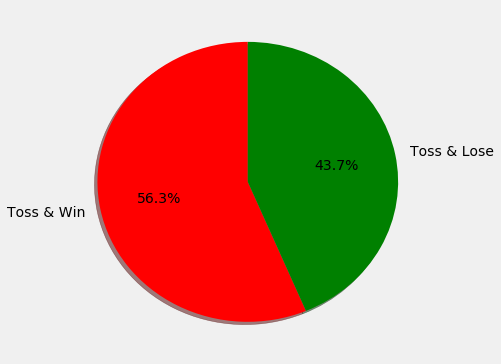

In [63]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
df_fil=df[df['toss_winner']==df['winner']]
slices=[len(df_fil),(577-len(df_fil))]
plt.pie(slices,labels=['Toss & Win', 'Toss & Lose'],startangle=90,shadow=True,explode=(0,0),autopct='%1.1f%%',colors=['r','g'])
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()
#toss winning does not guarantee a match win from analysis of current stats


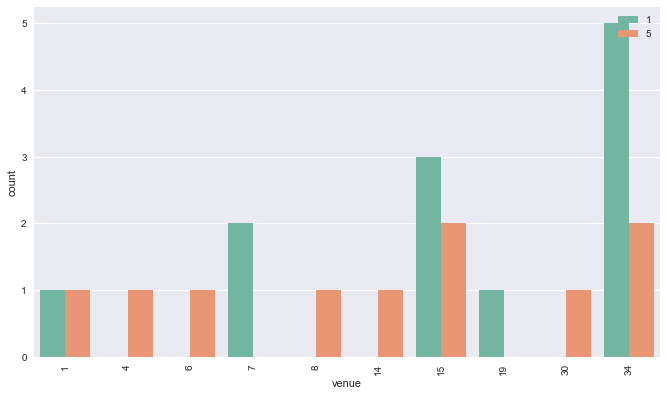

In [64]:
#top 2 team analysis based on number of matches won against each other and how own venue affects them?
#previously we noticed that CSK won 79,RCB won 70 matches
#now let us compare venue against a match between CSK & RCB
#we find that CSK has won most  matches against RCB in MA Chidambaram stadium,Chennai
#RCB has not won any match with CSK in stadiums St george's park and Wankhede Stadium, but won matches
#with CSK in Kingsmede,New Wanderers Stadium
#proves venue is important factor in predictability

import seaborn as sns
team1=dicVal['MI']
team2=dicVal['CSK']
mtemp=matches[((matches['team1']==team1)|(matches['team2']==team1))&((matches['team1']==team2)|(matches['team2']==team2))]
sns.countplot(x='venue', hue='winner', data=mtemp,palette='Set2')
plt.xticks(rotation='vertical')
leg=plt.legend(loc='upper right')
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()